# Table of Content: <a class="anchor" id="table-of-content"></a>
* [1. Problem Background and Motivation](#problem-background)
* [2. Libraries and Custom Functions](#import-packages)
* [3. Data Exploration/Prep](#data-prep)
* [4. Machine Learning Model](#ml-model)
* [5. Deployment of Model](#model-deployment)

# 1. Problem Background and Motivation <a class="anchor" id="problem-background"></a>


### What is the problem statement??<br>
Nowadas, it is very important for businesses to run efficiently i.e The employees who are dedicated and hardworking gets assigned to the teams which are working on critical and high priority projects. This will further boost the motovation of those employees to work harder and deliver, and will always be aligned with company's vision..<br>
But if employees who work hard don't get challenging projects, they might feel there is no growth for them in the company and might leave, or even if they stay, they wont work dedicatetly,  which would cause inefficiencies in the business..
<br> Hence this analysis presents a model which can help HR team correctly assign the employees to various teams depending on their years of experience and training level..

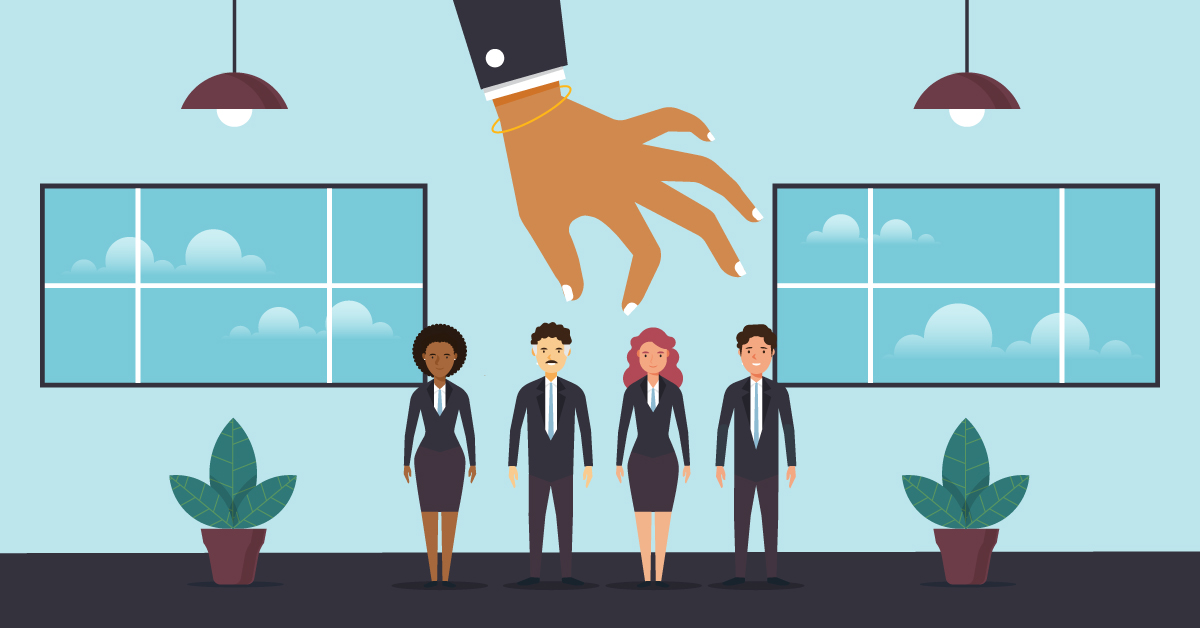

### Who are the stakeholders??
The Human Resources Team of any organization which is facing challenges in team allocations.

<hr>
<hr>

* [Go to Top](#table-of-content)

# 2. Libraries & Custom Functions <a class="anchor" id="import-packages"></a>
* [Go to Top](#table-of-content)

First things first, let's import the libraries which will be used in our machine learning model.
>**Pandas:**<br> 
Pandas has been one of the most commonly used tools for Machine learning, which is used for data cleaning and analysis.Based on the features available in pandas we can say pandas is best for handling data. It can handle missing data, cleaning up the data and it supports multiple file formats. This means it can read or load data in many formats like CSV, Excel, SQL, etc.
In this project, we will load CSV file using Pandas. 

>**Numpy:**<br> 
NumPy is a Python library used for working with arrays. It also has functions for working in domain of linear algebra, fourier transform, and matrices.

>**Math:**<br> 
Python has a built-in module that we can use for mathematical tasks. The math module has a set of methods and constants used to perform mathematical operations

>**SKLearn:**<br>
Scikit-learn (Sklearn) is the most useful and robust library for machine learning in Python. It provides a selection of efficient tools for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction via a consistence interface in Python.
>>**Logistic Regression:** It is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. In logistic regression, the dependent variable is a binary variable that contains data coded as 1 (yes, success, etc.) or 0 (no, failure, etc.). In other words, the logistic regression model predicts P(Y=1) as a function of X.<br><br>
>>**KNN:** It is a Machine Learning Classification which works by finding the distances between a query and all the examples in the data, selecting the specified number examples (K) closest to the query, then votes for the most frequent label (in the case of classification) or averages the labels (in the case of regression).<br><br>
>>**Accuracy Score:** The accuracy_score function calculates the accuracy score for the final output we are trying to predict (target or Y) against the true outcome of the target.<br><br>
>>**ROC Curve:** AUC - ROC curve is a performance measurement for the classification problems at various threshold settings. ROC is a probability curve and AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes. Higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1. By analogy, the Higher the AUC, the better the model is at distinguishing between patients with the disease and no disease.

>**Seaborn:** Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.<br><br>
>**Matplotlib:** Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. Matplotlib makes easy things easy and hard things possible.<br><br>
>**Plotly:** The plotly library is an interactive, open-source plotting library that supports over 40 unique chart types covering a wide range of statistical, financial, geographic, scientific, and 3-dimensional use-cases..<br><br>

In [1]:
# These libraries will be used to perform data analysis and mathematical operations
import pandas as pd
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format
import numpy as np
import random

#These libraries will be used to build data visualizations
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

#If using dark background..
#plt.style.use('dark_background')

#These libraries will be used to perform our machine learning model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import accuracy_score 

# Custom function below is used to display performance measures
# Required inputs are the model name and the two test data objects (X,y)
def class_perf_measures(model,X_test,y_test):
    # Create empty lists to store metric values created within loop
    TP = []
    TN = []
    FP = []
    FN = []
    recall = []
    precision = []
    F1 = []
    Accuracy = []
    
    # Create list of probability threshold values to loop over
    threshold = np.arange(0,1.1,0.1).tolist()

    # Start loop
    for i in threshold:

        # Create class assignments given threshold value
        y_test_pred_class = (model.predict_proba(X_test)[:,1] >= i).astype(int)

        # Append lists with metric values
        TP.append(metrics.confusion_matrix(y_test, y_test_pred_class)[1,1])
        TN.append(metrics.confusion_matrix(y_test, y_test_pred_class)[0,0])
        FP.append(metrics.confusion_matrix(y_test, y_test_pred_class)[0,1])
        FN.append(metrics.confusion_matrix(y_test, y_test_pred_class)[1,0])
        recall.append(metrics.recall_score(y_test, y_test_pred_class).round(3))
        precision.append(metrics.precision_score(y_test, y_test_pred_class).round(3))
        F1.append(metrics.f1_score(y_test, y_test_pred_class).round(2))
        Accuracy.append(metrics.accuracy_score(y_test, y_test_pred_class).round(2))

    # Create dataframe
    result = pd.DataFrame({"threshold":threshold,
                           "TP":TP,
                           "TN":TN,
                           "FP":FP,
                           "FN":FN,
                           "Precision":precision,
                           "Recall":recall,
                           "Accuracy": Accuracy
                          })

    # Let's look at our dataframe
    return result

# 3. Data Exploration/Prep <a class="anchor" id="data-prep"></a>
* [Go to Top of Notebook](#table-of-content)

- [ ] [Initial Evaluation](#initial-evaluation)
- [ ] [Outlier Detection & Treatment](#outliers)
- [ ] [Feature Selection](#feature-selection)
- [ ] [Data Partitioning](#data-split)
- [ ] [Data Normalization](#normalization)

> **Initial Evaluation** <a class="anchor" id="initial-evaluation"></a>

Let's first read 20 random samples of the data

In [2]:
df = pd.read_csv("SystemAdministrators.csv") # Defining DataFrame
filename = "SystemAdministrators.csv"
n = sum(1 for line in open(filename)) - 1 #number of records in file (excludes header)
s = 20 #desired sample size
skip = sorted(random.sample(range(1,n+1),n-s)) #the 0-indexed header will not be included in the skip list
df_random = pd.read_csv(filename, skiprows=skip)
df_random

,task_completed,employee_experience,training_level4,training_level6,training_level8
0,1,10.90,1,0,0
1,1,10.40,0,1,0
2,1,13.70,0,1,0
3,1,10.20,0,1,0
4,1,11.40,1,0,0
5,1,7.60,1,0,0
6,1,7.00,1,0,0
7,0,5.20,1,0,0
8,0,8.90,1,0,0
9,0,2.70,1,0,0


> **Initial Evaluation: Notes on Findings**<br><br>
>**Observations:**<br>
>>**Target:** task_completed (1 if task is completed, 0 otherwise)<br><br>

**Predictors**<br>
>**employee experience:** The number of years experience the employee has.<br>

>**training level:** The training level of the employee, i.e 4,6 and 8.. Higher training level should ensure highly skilled employee and the one who would get taks completed<br>


>[Go to Data Prep Outline](#data-prep)
---

> **Outlier Detection & Treatment** <a class="anchor" id="outliers"></a>

In [3]:
#Checking if duplicate values exist or any outliers.... 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
task_completed,75.00,0.20,0.40,0.00,0.00,0.00,0.00,1.00
employee_experience,75.00,6.80,2.27,2.70,5.20,6.30,7.85,13.70
training_level4,75.00,0.76,0.43,0.00,1.00,1.00,1.00,1.00
training_level6,75.00,0.17,0.38,0.00,0.00,0.00,0.00,1.00
training_level8,75.00,0.07,0.25,0.00,0.00,0.00,0.00,1.00


> **Feature Selection** <a class="anchor" id="feature-selection"></a>
<br>
We will Include everything qs all predictors are highly correlated with our target variable<br>


>[Go to Data Prep Outline](#data-prep)
---

> **Data Partitioning** <a class="anchor" id="data-split"></a>
<br>
The train-test split procedure is used to estimate the performance of machine learning algorithms when they are used to make predictions on data not used to train the model.
It is a fast and easy procedure to perform, the results of which allow you to compare the performance of machine learning algorithms for your predictive modeling problem.<br><br>
>To Do:<br>
>1. Put all potential predictor variables into new object called 'X'
>2. Put target variable in new object called 'y'
>3. Partition data into training set and testing set<br>

In [4]:
#Defining our Target Variable
target = ['task_completed']

#Defining X and Y
X = df.drop(target,axis=1)
y = df[target]

# Split data
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3,random_state=4)

>[Go to Data Prep Outline](#data-prep)
---

> **Data Normalization** <a class="anchor" id="normalization"></a>
<br><br>
>**Note:**<br>
>We do this **AFTER** splitting the data because we only want to use summary stats<br>
>**Data normalization** is used in machine learning to make model training less sensitive to the scale of features. This allows our model to converge to better weights and, in turn, leads to a more accurate model.


In [5]:
# Normalize predictor variables using Z-Scores.
# Use means and standard deviations of features as calculated in the TRAINING DATA
# New values are centered at 0.  Values reflect the number of standard deviations
# each record is above or below the mean.

features_means = X_train.mean()
features_std = X_train.std()

X_train = (X_train - features_means)/features_std
X_test = (X_test - features_means)/features_std

>[Go to Data Prep Outline](#data-prep)
---

# 4. Machine Learning <a class="anchor" id="ml-model"></a>

- [X] [kNN](#first-model)
- [X] [Logistic Model](#second-model)
- [X] [Performance Evaluation](#third-model)


* [Go to Top](#table-of-content)

> **kNN** <a class="anchor" id="first-model"></a>
<br>
>Instructions:<br>
>1. Fit numerous kNN models using different values for k. <br>
>2. Choose the "best" value for "k" based on Accuracy

In [6]:
# 1. train a classifier for different values of k
results = []
for k in [1,3,5,7,9,11,13,15,17,19,21]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train.values.ravel())
    
    # Get predicted class
    y_pred_class = knn.predict(X_test)
    
    # Put Accuracy Score in results object
    results.append({'k':k,
                    'accuracy':metrics.accuracy_score(y_test,y_pred_class)
                   }
                  )
# Put results from above into a Pandas Dataframe
results_df = pd.DataFrame(results)
results_df

,k,accuracy
0,1,0.70
1,3,0.70
2,5,0.70
3,7,0.70
4,9,0.70
5,11,0.70
6,13,0.70
7,15,0.70
8,17,0.70
9,19,0.70


>**Decision:**<br>
Based on the results above, I will set my number of neighbors (k) to 11 as this is the lowest value that achieves the highest accuracy value<br>

>**Re-run kNN using the value selected above:**<br>
For this final run of kNN, we will produce a table of performance measures across a range of probability threshold values

In [7]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train,y_train.values.ravel())

# Let's do a quick check to see if we have to worry about problems of overfitting.
# Remember!  Small values for "k" in kNN tend to lead to overfitting.
# Large value for "k" in kNN tend to produce underfit models
y_train_pred_class = knn.predict(X_train)
y_test_pred_class = knn.predict(X_test)

print('Training data Accuracy:', metrics.accuracy_score(y_train,y_train_pred_class).round(2))
print('Testing data Accuracy:', metrics.accuracy_score(y_test,y_test_pred_class).round(2))

Training data Accuracy: 0.87
Testing data Accuracy: 0.7


>**Logistic Model:** <a class="anchor" id="second-model"></a> 
<br>
>Let's produce the same table above but this time using a Logistic Model

In [8]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train.values.ravel())

# Let's do a quick check to see if we have to worry about problems of overfitting.
# Remember!  Small values for "k" in kNN tend to lead to overfitting.
# Large value for "k" in kNN tend to produce underfit models
y_train_pred_class = lr_model.predict(X_train)
y_test_pred_class = lr_model.predict(X_test)

print('Training data Accuracy:', metrics.accuracy_score(y_train,y_train_pred_class).round(2))
print('Testing data Accuracy:', metrics.accuracy_score(y_test,y_test_pred_class).round(2))

Training data Accuracy: 0.98
Testing data Accuracy: 0.7


>**Winning Model:**<a class="anchor" id="third-model"></a> 
<br>
We need to quickly decide which modeling framework to go forward with<br>
To keep this simple - I'm going to use AUC and will choose the model that gives us the highest value

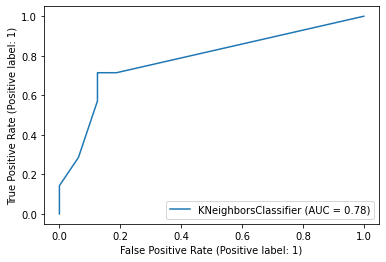

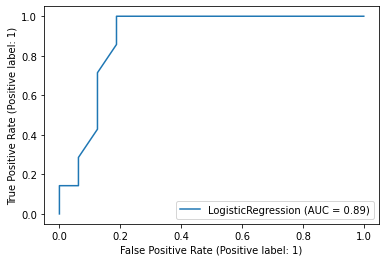

In [9]:
# ROC curve for kNN
RocCurveDisplay.from_estimator(knn, X_test, y_test)

# ROC curve for Logistic Model
RocCurveDisplay.from_estimator(lr_model, X_test, y_test)

>**Decision Point:**<br>
AUC is highest for our **Logistic Regression Model** i.e 0.89,  so I will use this model to further evaluate probability thresholds and corresponding performance measures

In [10]:
#Performance of  model across different probablity thresholds....
class_perf_measures(lr_model,X_test,y_test)

C:\Python\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,threshold,TP,TN,FP,FN,Precision,Recall,Accuracy
0,0.00,7,0,16,0,0.30,1.00,0.30
1,0.10,5,14,2,2,0.71,0.71,0.83
2,0.20,4,14,2,3,0.67,0.57,0.78
3,0.30,3,14,2,4,0.60,0.43,0.74
4,0.40,2,15,1,5,0.67,0.29,0.74
5,0.50,1,15,1,6,0.50,0.14,0.70
6,0.60,1,15,1,6,0.50,0.14,0.70
7,0.70,1,15,1,6,0.50,0.14,0.70
8,0.80,1,15,1,6,0.50,0.14,0.70
9,0.90,1,15,1,6,0.50,0.14,0.70


In order to decide which probablity threshold we should go ahead with, we need to think about what comes the costliest for a HR team while allocating resource across the business. <br>
So, for HR Team, if we are helping them with resource allocation i.e assigning an employee to a respective team, **False Positive** will prove out to be much more costly, because if HR Team assigns an employee to a respective team which will working on a very critical and high priority project, the employee will actually **Not Complete the Task**, but our model will show that the employee **Will Complete the task**... The results will be disastrous for the business.. As the employee gets assigned to that team working on a very critical and high priority project and that employee fails to deliver his/her work..<br>
On the other hand, False negative would be relatively less costly, the model prediction would show as **Task will not be Completed** but in actual the employee **will get the task completed**.... Which is fine because that respective employee regardless of any team he/she is working on, will always deliver on the assigned work which will always benefit the business... <br>
False negative only starts being costlier when the HR team misses out assigining that employee to critical and high priority project.. This might cause inefficiences in the business as in the long run that employee might leave the business citing growth issues.. 
<br>
So, in a nutshell we are much more concerned here about **Precision**.

1. **Prob Threshold = 0.1**:<br>
|                           | **0**                                         |    **1**                         |
|---------------------------|-----------------------------------------------|----------------------------------|
| **0**    	                |  14                                           | 2                                |
| **1**    	                |  2                                            | 5                                |


So, the confusion matrix above shows 2 cases as false positive, which is **Quite Low**. Thats why precision is high at  **71 %**. This means that the critical and high prioity projects will always get delivered as in most cases the employee who is likely to get the task completed will get assigned to those teams... <br>
On the other hand, False negative which are 2 cases are pretty low which will also work with the best interests of the business.. As the model predict much lesser number of employees who are not likely to get task completed but in actual they will get task completed... And thus maintaining the efficiency of business..

<br><br>
2. **Prob Threshold = 0.3**:

|                           | **0**                                         |    **1**                         |
|---------------------------|-----------------------------------------------|----------------------------------|
| **0**    	                |  14                                           | 2                                |
| **1**    	                |  4                                            | 3                                |


So, the confusion matrix above shows again 2 cases as false positive, which is **Quite Low**. This again means that the critical and high prioity projects will always get delivered as in most cases the employee who is likely to get the task completed will get assigned to those teams... <br>
On the other hand, False negative cases are have slightly increased from 2 to 4.. This means that HR team might miss out assigning the employee who is likely to get task completed to team working on criticial and high projects...

<br><br>
3. **Prob Threshold = 0.5**:

|                           | **0**                                         |    **1**                         |
|---------------------------|-----------------------------------------------|----------------------------------|
| **0**    	                |  15                                           | 1                                |
| **1**    	                |  6                                            | 1                                |

So, the confusion matrix above shows only 1 case as false positive, which is **Very Low**. This again means that the critical and high prioity projects will always get delivered as in most cases the employee who is likely to get the task completed will get assigned to those teams... <br>
On the other hand, False negative cases have increased tp 6 which will **not** work with the best interests of the business.. As the model predict much **higher** number of employees who are not likely to get task completed but in actual they will get task completed... This will cause inefficiences in the business as the dedicated employee might not get assigned to the team working on critical and high priority projects... In long run this might affect those employees growth in their career, and **attrition** might occur... Which is again inefficient for the business.. 
<br><br>

**So which threshold we should go ahead with???**<br>
Hence, we will go ahead with probablity threshold of **0.1**, because it the finds out the best intermediate way between False positive and False Negative.. This threshold will make sure that employees who are likely to get tasks done only gets assigned to team working on critical and high priority projects and vice versa....

>[Go to Machine Learning Outline](#ml-model)
---



# 5. Deployment of Model <a class="anchor" id="model-deployment"></a>


* [Go to Top](#table-of-content)
<br>

>**pickle_out** is a new object that allows to WRITE BINARY (wb) to a new file called 'classifier'<br>
once completed, we'll find this new file in the same folder as our Jupyter Notebook

>**pickle.dump()** translates our model functionality (as defined above) into binary and loads it into the pickle_out object...which, by extension, dumps everything into the new file "classifier"<br>

>**pickle_out.close()** is simply shutting down the pickle operation.

<hr>

> Streamlit is a great tool to create beautiful data applications quite easily but when it comes to deploying them and making them accessible, we should make sure that our data is secured. Because protecting data from internal or external corruption and illegal access protects a company from financial loss, reputational harm, consumer trust degradation, and brand erosion.<br>

In [11]:
X = df.iloc[:,1:len(df.columns)] 
y = df.iloc[:,0]
model = LogisticRegression(max_iter=800)
model.fit(X,y)
predictions = model.predict(X)
print(accuracy_score(y,predictions)) 

0.9066666666666666


In [12]:
import pickle
pickle_out = open('classifier', mode='wb')                      # We are creating a new object called 'pickle_out'.  
                                                                # This object contains a new file called 'classifier'
                                                                # and this is in 'write' mode.  And we are opening 
                                                                # it to write 'binary' to it (wb).
            
pickle.dump(model, pickle_out)                                  # use the pickle library to 'export' or 'translate' our 
                                                                # previously created ML model object ('model') into the
                                                                # binary 'classifier' file created in the code 
                                                                # immediately preceding this line.
            
pickle_out.close()                                              # close the pickle object now that we've written our 
                                                                # Python to it.

>  - The '''**writefile app.py**''' lets us output code developed in our Notebook to a Python module.<br>
>  - In second line, we imported **pickle library** to implement the binary protocol.<br>
>  - In the third line, we imported **streamlit** library, Streamlit helps us create web apps for machine learning models in a short time, you can also customize the web apps. <br><br>
>  - Then, we will define our function 'prediction' which will take inputs from the data we enter in the model, and will return us the prediction. 
>  - Finally, In the end, we launch streamlit which will help us work with our model on a webpage. 

In [13]:
%%writefile app.py


import pickle
import streamlit as st
# this function will add a new background image on the Streamlit web app of our choice. 
def add_bg_from_url():
    st.markdown(
         f"""
         <style>
         .stApp {{
             background-image: url("https://res.allmacwallpaper.com/get/iMac-21-inch-wallpapers/Prediction-background-1920x1080/1713-9.jpg");
             background-attachment: fixed;
             -webkit-background-size: cover;
             -moz-background-size: cover;
             -o-background-size: cover;
            background-size: cover;
            height:100%;
         }}
         </style>
         """,
         unsafe_allow_html=True
     )

add_bg_from_url() 

pickle_in = open('classifier', 'rb')
classifier = pickle.load(pickle_in)

@st.cache()

# Defining the function - prediction() which will make the prediction using data
# inputs from users.

def prediction(employee_experience,
              training_level4,
              training_level6,
              training_level8):
    
    # Making prediction based on the inputs received from the users.
    prediction = classifier.predict(
        [[employee_experience,
              training_level4,
              training_level6,
              training_level8]])
    
    if prediction == 0:
        pred = 'Warning!The task is not likely to get completed'
    else:
        pred = 'The task is likely to get completed'
    return pred

# This is the main function in which we define our webpage
def main():
    
    st.title("Task Completion Predictor")
    st.write("Please enter the Details below:")
    col1, col2 = st.columns(2)
    # Creating the input fields
    with col1:
        st.subheader("Employee Experience Info")
        
        employee_experience = st.number_input("Enter the years of experience of employee",
                          min_value=0,
                          max_value=24,
                          value=0,
                          step=1
                         )
    with col2:
        st.subheader("Employee Training Info")
        training_level4 = st.number_input("Is Employee at Training Level 4?(0-1)",
                          min_value=0,
                          max_value=1,
                          value=0,
                          step=1
                         )
        training_level6 = st.number_input("Is Employee at Training Level 6?(0-1)",
                          min_value=0,
                          max_value=1,
                          value=0,
                          step=1
                         )
        training_level8 = st.number_input("Is Employee at Training Level 8?(0-1)",
                          min_value=0,
                          max_value=1,
                          value=0,
                          step=1
                         )

    result = ""
    
    # When 'Predict' is clicked, make the prediction and store it
    if st.button("Predict"):
        result = prediction(employee_experience,
              training_level4,
              training_level6,
              training_level8)
        
        st.success(result)
        
if __name__=='__main__':
    main()

Overwriting app.py


In [ ]:
!streamlit run app.py                                                 # Launching the Streamlit web app!! We are all set :D 